# Math Foundations (Calculus for Machine Learning)

This notebook covers the essential calculus concepts required for Machine Learning:
- Functions and Limits
- Derivatives and Gradients
- Partial Derivatives
- Gradient Descent

We will also implement **hands-on exercises** in Python using `SymPy`, `NumPy`, and `Matplotlib`.


## Functions & Limits

A **function** maps input values to output values.

Example:  
$f(x) = 3x^2 + 2x + 1$

A **limit** describes the behavior of a function as the input approaches a certain value.

Example:  
$\lim_{x \to 0} \frac{\sin(x)}{x} = 1$


In [1]:
import sympy as sp

# Define variable
x = sp.symbols('x')

# Define function
f = 3*x**2 + 2*x + 1

# Limit example
limit_expr = sp.sin(x)/x
limit_result = sp.limit(limit_expr, x, 0)

f, limit_result


(3*x**2 + 2*x + 1, 1)

## Derivatives & Gradients

- The **derivative** measures the rate of change of a function.
- If $f(x) = 3x^2 + 2x + 1$, then:

$f'(x) = 6x + 2$

- A **gradient** is the vector of partial derivatives for multivariable functions.


In [2]:
# Derivative of f(x)
f_prime = sp.diff(f, x)
f_prime


6*x + 2

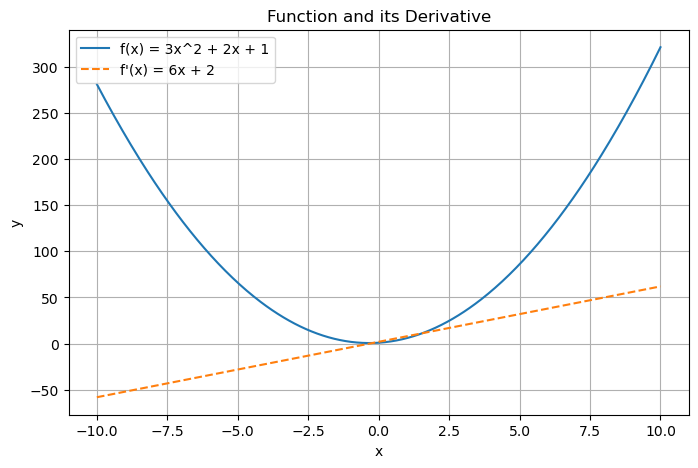

In [3]:
# Plot function and derivative
import numpy as np
import matplotlib.pyplot as plt

f_func = sp.lambdify(x, f, 'numpy')
f_prime_func = sp.lambdify(x, f_prime, 'numpy')

X = np.linspace(-10, 10, 400)
Y = f_func(X)
Y_prime = f_prime_func(X)

plt.figure(figsize=(8,5))
plt.plot(X, Y, label="f(x) = 3x^2 + 2x + 1")
plt.plot(X, Y_prime, label="f'(x) = 6x + 2", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Function and its Derivative")
plt.grid(True)
plt.show()


## Partial Derivatives

For multivariable functions, we compute derivatives with respect to one variable while keeping others constant.

Example:  
$f(x, y) = x^2y + 3y$

- $\frac{\partial f}{\partial x} = 2xy$
- $\frac{\partial f}{\partial y} = x^2 + 3$


In [4]:
# Multivariable function
y = sp.symbols('y')
f_xy = x**2 * y + 3*y

# Partial derivatives
df_dx = sp.diff(f_xy, x)
df_dy = sp.diff(f_xy, y)

df_dx, df_dy


(2*x*y, x**2 + 3)

## Gradient Descent Basics

Gradient Descent is an optimization algorithm to minimize a function by iteratively updating parameters:

$\theta = \theta - \eta \cdot \nabla f(\theta)$

where:
- $\eta$ = learning rate
- $\nabla f(\theta)$ = gradient


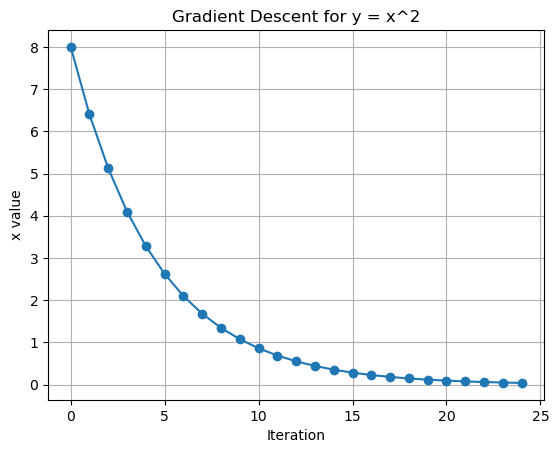

In [5]:
# Gradient Descent for y = x^2
def gradient_descent(starting_point, learning_rate, iterations):
    x = starting_point
    history = []
    for i in range(iterations):
        grad = 2 * x   # derivative of y = x^2
        x = x - learning_rate * grad
        history.append(x)
    return history

history = gradient_descent(starting_point=10, learning_rate=0.1, iterations=25)

plt.plot(history, marker='o')
plt.title("Gradient Descent for y = x^2")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.grid(True)
plt.show()


## Gradient Descent for Linear Regression

We try to fit:  
$y = mx + b$

Loss function (Mean Squared Error):  
$L = \frac{1}{n} \sum (y_i - (mx_i + b))^2$


In [6]:
# Dummy dataset
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 6, 8, 10])  # y = 2x

# Initialize parameters
m, b = 0.0, 0.0
lr = 0.01
epochs = 1000

n = len(X)

for _ in range(epochs):
    Y_pred = m*X + b
    dm = (-2/n) * sum(X * (Y - Y_pred))
    db = (-2/n) * sum(Y - Y_pred)
    m -= lr * dm
    b -= lr * db

m, b


(1.9951803506719779, 0.017400463340610635)

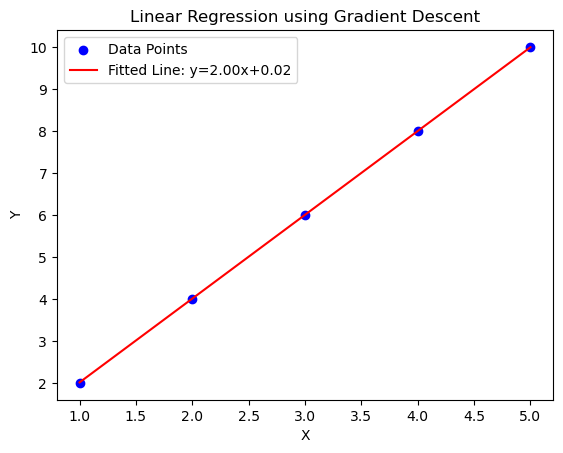

In [7]:
# Plot regression line
plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, m*X + b, color="red", label=f"Fitted Line: y={m:.2f}x+{b:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using Gradient Descent")
plt.show()


# Conclusion

In this notebook, we covered:

- Functions and Limits
- Derivatives and Gradients
- Partial Derivatives
- Gradient Descent (basic + linear regression)

These concepts form the foundation of **optimization in Machine Learning**.
